# Logistic Regressionin python

# Data cleaning

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [170]:
Record_train=pd.read_csv('/Users/atousa/Desktop/sheridan/Python-Data-Science-and-Machine-Learning-Bootcamp 2/titanic_train.csv',sep=',',index_col=0)
Record_test=pd.read_csv('/Users/atousa/Desktop/sheridan/Python-Data-Science-and-Machine-Learning-Bootcamp 2/titanic_test.csv',sep=',',index_col=0)
Record_train.drop('Cabin',axis=1,inplace=True)
Record_test.drop('Cabin',axis=1,inplace=True)
frame=[Record_train,Record_test]
Record=pd.concat(frame)
Record.dropna(inplace=True)

In [171]:
Record.head(n=5)

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,
1,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


In [172]:
Sex=pd.get_dummies(Record['Sex'],drop_first=True)

In [173]:
Embarked=pd.get_dummies(Record['Embarked'],drop_first=True)

In [174]:
Record1=pd.concat([Record.drop(['Sex','Embarked','Ticket','Name'],axis=1),Sex,Embarked],axis=1)

In [175]:
Record1.head(n=5)

,Age,Fare,Parch,Pclass,SibSp,Survived,male,Q,S
PassengerId,,,,,,,,,
1,22.0,7.2500,0,3,1,0.0,1,0,1
2,38.0,71.2833,0,1,1,1.0,0,0,0
3,26.0,7.9250,0,3,0,1.0,0,0,1
4,35.0,53.1000,0,1,1,1.0,0,0,1
5,35.0,8.0500,0,3,0,0.0,1,0,1


# Data Visulalization

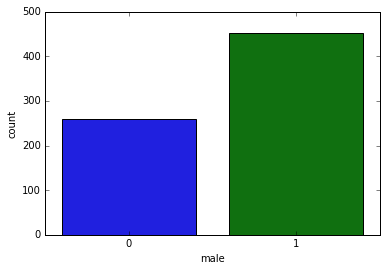

In [176]:
sns.countplot(Record1['male']);

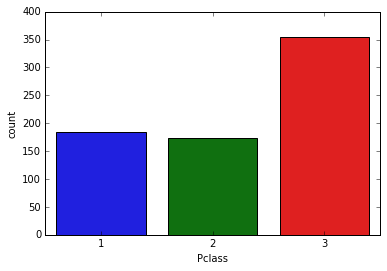

In [177]:
sns.countplot(Record1['Pclass']);

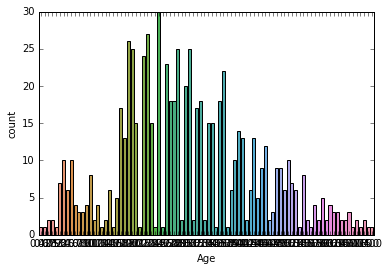

In [178]:
sns.countplot(Record1['Age']);

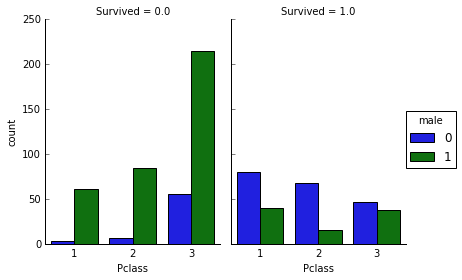

In [179]:
g = sns.factorplot(x="Pclass", hue="male", col="Survived",data=Record1, kind="count",size=4, aspect=.7);

# Logistic regression Algorithm

In [180]:
X=Record1.drop(['Survived'],axis=1)
Y=Record1['Survived']

In [181]:
Y.head(n=5)

PassengerId
1    0.0
2    1.0
3    1.0
4    1.0
5    0.0
Name: Survived, dtype: float64

In [182]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [183]:
from sklearn.linear_model import LogisticRegression
L_R=LogisticRegression()
L_R.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Prediction

In [184]:
Prediction=L_R.predict(X_test)

In [192]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Prediction))

             precision    recall  f1-score   support

        0.0       0.78      0.86      0.82       122
        1.0       0.78      0.67      0.73        92

avg / total       0.78      0.78      0.78       214



In [193]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Prediction))

[[105  17]
 [ 30  62]]
